In [36]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../../data/labeled-cleaned.csv', header=0)

In [3]:
df

,index,title,article,label
0,1305,"Nikki Bella Now Believes John Cena Wants Kids,...",John Cena's very public campaign to win back N...,4.5
1,6528,Rouhani says Iran will keep producing missiles...,DUBAI (Reuters) - Iran will continue to produc...,3.0
2,13823,Jerry Jones: Ezekiel Elliott Won't Be Suspended,Jerry Jones tells TMZ Sports he does not belie...,4.5
3,29908,Sen. Marco Rubio just threatened to “take care...,The decorum of the United States Senate was on...,3.5
4,31325,Darius McCrary Says Estranged Wife's Out for F...,"Former ""Family Matters"" star Darius McCrary to...",3.0
...,...,...,...,...
962,2678751,Stimulus bill: When will you see money and ben...,(CNN)Congress and President Donald Trump have...,3.5
963,2679327,California coronavirus: Doctors 'cautiously ho...,(CNN)Two weeks after San Francisco issued the...,4.0
964,2683873,$4.3 Million Homes in California,What you Get A French Caribbean-inspired home ...,4.0
965,2684134,"Ventilators and Coronavirus: Amid Desperation,...",President Trump wants the private sector to fi...,2.5


In [5]:
df_equal = df[df['title'] == df['article']]

In [6]:
df_equal

,index,title,article,label
590,1605034,JPMORGAN CHASE CFO - BANK FUTURE EXPENSES NOT ...,JPMORGAN CHASE CFO - BANK FUTURE EXPENSES NOT ...,5.0
606,1633272,U.S. IMPOSING 17.5 PERCENT TARIFF ON MEXICAN T...,U.S. IMPOSING 17.5 PERCENT TARIFF ON MEXICAN T...,3.5
836,2309597,U.S. FEDERAL AVIATION ADMINISTRATION SAYS DOWN...,U.S. FEDERAL AVIATION ADMINISTRATION SAYS DOWN...,3.5
848,2356707,MEDIOBANCA SAYS CONSUMER BANKING TO ACCOUNT FO...,MEDIOBANCA SAYS CONSUMER BANKING TO ACCOUNT FO...,4.5
855,2371517,SHANGHAI'S MOST ACTIVE NICKEL CONTRACT FALLS 2...,SHANGHAI'S MOST ACTIVE NICKEL CONTRACT FALLS 2...,4.0
948,2636680,ITALIAN GOVERNMENT CONSIDERS SHUTTING DOWN MIL...,ITALIAN GOVERNMENT CONSIDERS SHUTTING DOWN MIL...,3.5


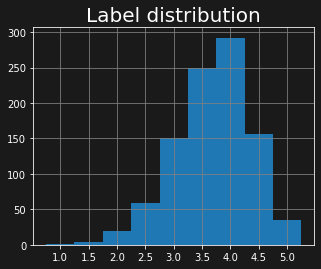

In [52]:
bins = [0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25]
ax = df.label.hist(bins=bins)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.patch.set_alpha(0)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.xticks(np.arange(1, 5.5, 0.5))

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
plt.gcf().subplots_adjust(left=0.25)
fig = ax.get_figure()
ax.set_facecolor((0.1, 0.1, 0.1))
fig.patch.set_facecolor((0.1, 0.1, 0.1))
plt.title(label="Label distribution",
          fontsize=20,
          color="white")
plt.grid(c='gray')
fig.savefig('../../images/label_distribution.png', transparent=False)

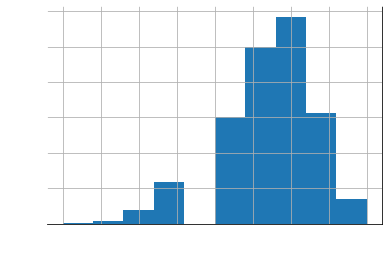

In [11]:
ax = df.label.hist()
plt.xlabel("Correlation value")
plt.ylabel("Count")
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.patch.set_alpha(0)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')

In [26]:
fig = ax.get_figure()
fig.savefig('../../images/label_hist.png', transparent=True)

In [7]:
df.label.var()

0.4538614870434518

In [43]:
min_label = df.groupby(df['index']).aggregate({'title': 'first', 'article': 'first', 'label': 'min'})

In [44]:
max_label = df.groupby(df['index']).aggregate({'title': 'first', 'article': 'first', 'label': 'max'})

In [45]:
dist_df = pd.DataFrame()

In [46]:
dist_df['dist'] = max_label['label'] - min_label['label']

In [47]:
dist_df

,dist
index,
1305,0.0
6528,0.0
13823,0.0
29908,0.0
31325,0.0
...,...
2678751,0.0
2679327,0.0
2683873,0.0


In [ ]:
bins = [0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25]
ax = df.label.hist(bins=bins)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.patch.set_alpha(0)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.xticks(np.arange(0, 5, 0.5))

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
plt.gcf().subplots_adjust(left=0.25)
fig = ax.get_figure()
ax.set_facecolor((0.1, 0.1, 0.1))
fig.patch.set_facecolor((0.1, 0.1, 0.1))
plt.title(label="Label distribution",
          fontsize=20,
          color="white")
plt.grid(c='gray')
fig.savefig('../../images/label_distribution.png', transparent=False)

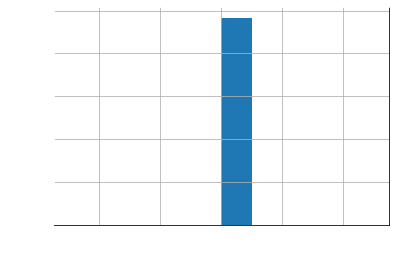

In [48]:
ax = dist_df.dist.hist()
plt.xlabel("Correlation distance")
plt.ylabel("Count")
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.patch.set_alpha(0)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')

In [33]:
fig = ax.get_figure()
fig.savefig('../../images/label_distance_hist.png', transparent=True)

In [35]:
dist_df.dist.var()

0.781486786522539